In [1]:
from finvizfinance.quote import finvizfinance
ticker = 'NFLX'
stock = finvizfinance(ticker)

In [2]:
news_df = stock.ticker_news()
news_df['Tickers'] = ticker
news_df

,Date,Title,Link,Tickers
0,2023-03-05 20:56:00,Netflix making live-action 'One Piece' from po...,https://finance.yahoo.com/news/netflix-making-...,NFLX
1,2023-03-05 15:06:00,Britain's Prince Harry invited to King Charles...,https://finance.yahoo.com/news/britains-prince...,NFLX
2,2023-03-05 08:38:00,Chris Rock Slaps Back in Netflixs First Live C...,https://finance.yahoo.com/m/40e4ae24-8fb3-3d6c...,NFLX
3,2023-03-05 00:32:00,Chris Rock unleashes on Will Smith and wife Ja...,https://finance.yahoo.com/news/chris-rock-unle...,NFLX
4,2023-03-03 15:44:00,Netflix is still Netflix as they produce live ...,https://finance.yahoo.com/video/netflix-still-...,NFLX
...,...,...,...,...
95,2023-02-12 10:31:00,2 Stocks That Are Fantastic Deals Right Now,https://finance.yahoo.com/m/6aa18f20-0dfb-359d...,NFLX
96,2023-02-12 07:31:00,"1 Growth Stock to Buy in 2023, and 1 to Avoid ...",https://finance.yahoo.com/m/28459ca2-4694-3433...,NFLX
97,2023-02-12 07:15:00,A Bull Market Is Coming: 1 FAANG Stock to Avoi...,https://finance.yahoo.com/m/f14b0c34-cc79-32c3...,NFLX
98,2023-02-11 17:05:00,Is Netflix Stock A Buy After Video Streamer's ...,https://finance.yahoo.com/m/815ee59a-c296-3fd4...,NFLX


In [3]:
outer_ratings_df = stock.ticker_outer_ratings()
outer_ratings_df

,Date,Status,Outer,Rating,Price
0,2023-01-23,Reiterated,Argus,Buy,$340 → $390
1,2023-01-20,Reiterated,Wolfe Research,Outperform,$366 → $417
2,2023-01-20,Reiterated,Wedbush,Outperform,$400 → $410
3,2023-01-20,Reiterated,The Benchmark Company,Sell,$225 → $250
4,2023-01-20,Reiterated,Robert W. Baird,Neutral,$275 → $325
5,2023-01-20,Reiterated,Pivotal Research Group,Buy,$375 → $400
6,2023-01-20,Reiterated,Piper Sandler,Neutral,$270 → $325
7,2023-01-20,Reiterated,Oppenheimer,Outperform,$400 → $415
8,2023-01-20,Reiterated,MoffettNathanson,Market Perform,$240 → $250
9,2023-01-20,Reiterated,Jefferies,Buy,$385 → $400


In [4]:
import yfinance as yf
ticker= get_data("amzn", start_date="12/04/2009", end_date="12/04/2019", index_as_date = True, interval="1wk")
ticker.info

NameError: name 'get_data' is not defined

In [ ]:
import yahoo_fin.stock_info as si
dow_list = si.tickers_nasdaq()
print("Tickers in NasdaQ:", len(dow_list))
dow_list

In [ ]:
import yahoo_fin.stock_info as si
si.get_analysts_info('nflx')

In [ ]:
from yahoo_fin.stock_info import *
import yfinance as yf
nasdaq = tickers_nasdaq()
nasdaq_list = nasdaq[:10]
for i in nasdaq_list:
    ticker = yf.download(i,interval='1m',period='1d',progress=False)
    ticker['Ticker'] = i
    print(ticker)

In [ ]:
from yahoo_fin.stock_info import *
import yfinance as yf
ticker = "ACE.BK"
data = yf.Ticker(ticker)
data.news

In [ ]:
from bs4 import BeautifulSoup
import requests


url = 'https://www.nasdaq.com/articles/will-roku-stock-break-hearts-this-week'
headers = {
    'User-Agent': 'Chrome/58.0.3029.110'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'lxml')
data = soup.find('h1', class_='jupiter22-c-hero-article-title')

if data:
    print(data.text)
else:
    print('Could not find the data')

In [ ]:
import unittest
from unittest.mock import patch,MagicMock
import sqlite3
import pandas as pd
import datetime as dt
import yfinance as yf
from pandas.testing import assert_frame_equal

def save_data_news(data):
    # connect to the database
    conn = sqlite3.connect('stock.sqlite')
    # save the data to the database
    data.to_sql('stock_news',con=conn,if_exists='append',index=False)
    # close the connection
    conn.close()
df2 = pd.DataFrame()
df1 = pd.DataFrame({'Datetime': ['2023-02-19'], 'Title':['ทอท.'], 'Link':['Test'], 'Body':['Test'], 'Ticker':['AOT']})
df2 = pd.concat([df2,df1],ignore_index=True)
save_data_news(df2)


Spatial

In [6]:
import sqlite3
import pandas as pd
import datetime as dt
import yfinance as yf

content_news = []
conn = sqlite3.connect("stock.sqlite")
cur = conn.cursor()
query = "SELECT Ticker FROM stock_info"
r_df = pd.read_sql(query, conn)
list_db = r_df['Ticker'].values.tolist()
df2 = pd.DataFrame()

for i in list_db:
    query2 = "SELECT ticker,body FROM stock_news WHERE `Ticker` = '%s'" % i
    news = pd.read_sql(query2, conn)
    if not(news.empty):
        df2 = pd.concat([df2,news],ignore_index=True)
    
df2

,Ticker,Body
0,AAVE-USD,Walt Disney Co DIS faced flak after some Disne...
1,AAVE-USD,"SASKATOON, Saskatchewan, Feb. 17, 2023 ( GLOBE..."
2,AAVE-USD,NOT FOR DISSEMINATION IN THE UNITED STATES OR ...
3,AAVE-USD,Ensures Access to Kroger Family of Pharmacies ...
4,AAVE-USD,Australian software firm Atlassian Corp TEAM a...
...,...,...
36836,ZS,Shares of several cybersecurity firms are trad...
36837,ZS,Someone with a lot of money to spend has taken...
36838,ZS,The increased demand for security and networki...
36839,ZS,Needham analyst reiterated Buy on CrowdStrike ...


In [ ]:
import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [8]:
import locationtagger
from geopy.geocoders import Nominatim

# initializing sample text
sample_text = "India has very rich and vivid culture\
       widely spread from Kerala to Nagaland to Haryana to Maharashtra. " \
       "Delhi being capital with Mumbai financial capital.\
       Can be said better than some western cities such as " \
       " Munich, London etc. Pakistan and Bangladesh share its borders"

def getcity_to_latlong(text):
    # extracting entities.
    place_entity = locationtagger.find_locations(text = text)

    # calling the Nominatim tool
    loc = Nominatim(user_agent="GetLoc")
    address = pd.DataFrame()

    for i in place_entity.cities:
        getLoc = loc.geocode(i)
        ones = pd.DataFrame({'city':[i],'lat':[getLoc.latitude],'long':[getLoc.longitude]})
        # getting all cities
        address = pd.concat([address,ones],ignore_index=True)
    return address

getcity_to_latlong(sample_text)

,city,lat,long
0,Mumbai,19.078545,72.878176
1,Delhi,28.651718,77.221939
2,London,51.507336,-0.127650
3,Munich,48.137108,11.575382
4,Haryana,29.000000,76.000000


In [9]:
place = pd.DataFrame()
count = 0
for i in df2['Body']:
    if count < 1000:
        data = getcity_to_latlong(i)
        place = pd.concat([place,data],ignore_index=True)
    else:
        break
    count += 1
place

,city,lat,long
0,Saskatoon,52.131802,-106.660767
1,Globe,41.990376,-71.523673
2,Access,38.209249,-83.071005
3,Washington,38.895037,-77.036543
4,Purchase,41.040931,-73.714575
...,...,...,...
510,Shanghai,31.232276,121.469207
511,China,35.000074,104.999927
512,Strong,33.110360,-92.356579
513,Four,45.587454,5.193922


In [10]:
address = place

In [11]:
add = address.groupby(address.columns.tolist(),as_index=False).size()
add.rename(columns={'size': 'population'}, inplace=True)
add

,city,lat,long,population
0,Access,38.209249,-83.071005,1
1,Allen,40.807780,-84.057222,2
2,Almaty,43.236392,76.945728,2
3,America,39.783730,-100.445882,5
4,Anet,48.855256,1.439190,1
...,...,...,...,...
175,Virginia,37.123224,-78.492772,3
176,Warren,41.811960,-79.265445,1
177,Washington,38.895037,-77.036543,5
178,Waterloo,42.498275,-92.332874,4


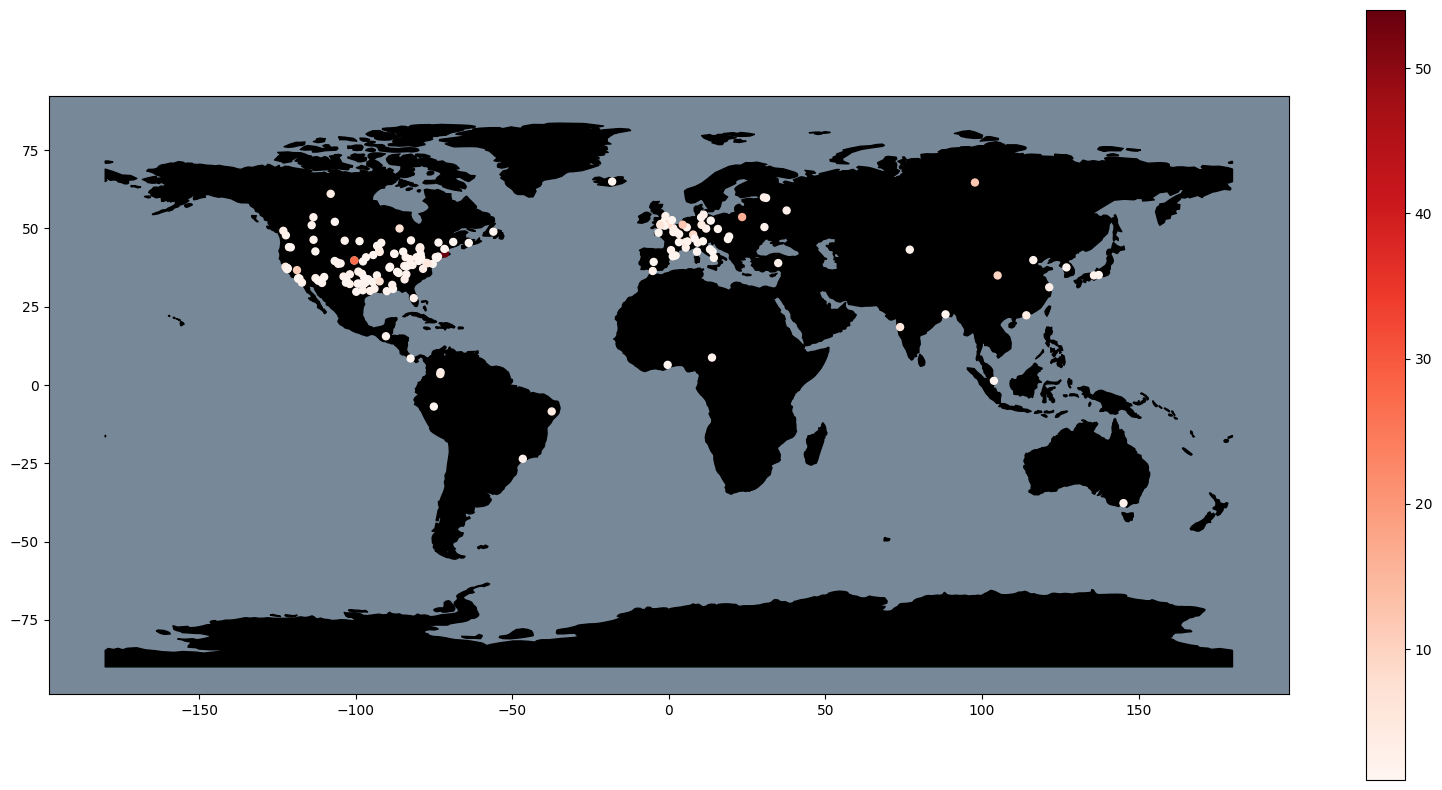

In [48]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = add

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(20, 10),color='black', edgecolor='black')
a = gdf.plot(ax=base, marker='o', column='population', cmap = 'Reds', markersize=25,legend=True)
a.set_facecolor("lightslategray")